<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->

# **<center>Model for Predicting Credit Card Customer Attrition** </center>
----------
<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->

<!-- ![alternatvie text](https://www.bankofbaroda.in/-/media/project/bob/countrywebsites/india/blogs/images/new-credit-card-rules-effective-from-july-1-2022.jpg) -->

<img style="float: right;" src=https://png2.cleanpng.com/sh/d25e93b36f0be22486e704bcfaf9e618/L0KzQYm3WMA1N6pviJH0aYP2gLBuTfNzbZVujJ9sYYLnPbXsgvl1NZRmitY2cHzkg8Xwg71xepDpjdV9LUXlRoe5WPEyPmI2UKUELka7Q4aBU8cxOWY4S6Y7MUe1SYSCV8cveJ9s/kisspng-credit-card-debit-card-plastic-product-5b6628a1611839.6835837015334217293977.png width="400">


--------------------


**PROJECT DESCRIPTION:**

This project aims to develop a model that effectively predicts customer attrition for a credit card company. Moreover, this activity aims to identify key factors that contribute to attrition and deliver actionable insights to minimize client loss. The scope of work will include data collection, cleaning, analysis, feature selection, and model creation utilizing machine learning methods.

High attrition rates have negative impact on a company’s financial bottom line, hence, it is vital to retain customers and lower churn rates to improve profitability. By implementing this project, the business will be able to identify customers that are at risk of attrition and be able to craft targeted and proactive anti-attrition campaigns.

**OBJECTIVES:**
1. Identify early indicators of credit card attrition based on customer profile and spend behaviour
2. Build a predictive model to identify and segment customers based on attrition risk


<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->
-----------

In [17]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Load the CSV data into a DataFrame
input_data = pd.read_csv("creditcardattritiondata.csv", header=0)

# Fix feature name/s
input_data = input_data.rename(columns={
    'CLIENTNUM': 'Client_Num',
    'Dependent_count': 'Dependent_Count',
    'Months_on_book': 'Months_on_Book',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier_2'
})

print(input_data.shape)

input_data.head()

(10127, 23)


,Client_Num,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Observations:**
- The raw data has 10,127 observations/rows and 23 variables/columns.
- Y Variable / Dependent Variable is <b>Attrition_Flag</b>
- X Variable / Independent Variables will be taken from the other 22 variables 

#### Descriptive statistics summary of data

In [19]:
# Display dataframe information to get more details about the raw data.
input_data.info()

# Overview of the summary statistics: mean, min, max, std
input_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_Num                10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_Count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_Book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,Client_Num,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->
----------
## Data Pre-Processing
----------

In [20]:
# Create a summary of column attributes

count_unique_values = []
for column in input_data:
    # Count unique values for each column
    cnt_unique_values = len(input_data[column].unique())
    count_unique_values.append(cnt_unique_values)
    
# Count 'Unknown' values for each column
count_unknown = input_data[input_data=='Unknown'].count()

# Count null values for each column    
count_null = input_data.isnull().sum()

# Count NaN values for each column    
count_nan = input_data.isna().sum()

# Summarize column attributes using a dataframe
data_summary = pd.DataFrame()
data_summary['column_name'] = []
data_summary['data_type'] = input_data.dtypes
data_summary['column_name'] = data_summary.index

# Add details
data_summary['count_unique_values'] = count_unique_values
data_summary['count_unknown'] = count_unknown
data_summary['count_null'] = count_null
data_summary['count_nan'] = count_nan

data_summary

,column_name,data_type,count_unique_values,count_unknown,count_null,count_nan
Client_Num,Client_Num,int64,10127,0,0,0
Attrition_Flag,Attrition_Flag,object,2,0,0,0
Customer_Age,Customer_Age,int64,45,0,0,0
Gender,Gender,object,2,0,0,0
Dependent_Count,Dependent_Count,int64,6,0,0,0
Education_Level,Education_Level,object,7,1519,0,0
Marital_Status,Marital_Status,object,4,749,0,0
Income_Category,Income_Category,object,6,1112,0,0
Card_Category,Card_Category,object,4,0,0,0
Months_on_Book,Months_on_Book,int64,44,0,0,0


In [21]:
# Check for duplicate records
print('No. of duplicate records:',input_data.duplicated().sum())

No. of duplicate records: 0


**Observations:**
- No feature has null or nan values
- No duplicate records
- Education_Level, Marital_Status and Income_Category have 'Unknown' data as value

#### Drop unnecessary features

In [22]:
# Keep a copy of the original data and create a new dataframe for the Analytical Base Table (ABT) / model data
model_data = input_data.drop(['Client_Num','Naive_Bayes_Classifier_1','Naive_Bayes_Classifier_2'], axis=1)
model_data.shape

(10127, 20)

**Observation:**
- The updated model data has 10,127 observations/rows and 20 variables/columns.

#### Transform Target Variable <b>Attrition_Flag</b> to numerical value

In [23]:
# Transform Attrition_Flag to 1/0 value (Attrited Customer: 1, Existing Customer: 0)
model_data['Attrition_Flag'] = model_data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})

model_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->
----------
## Exploratory Data Analysis
----------


Count:
0    8500
1    1627
Name: Attrition_Flag, dtype: int64

Distribution:
0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64


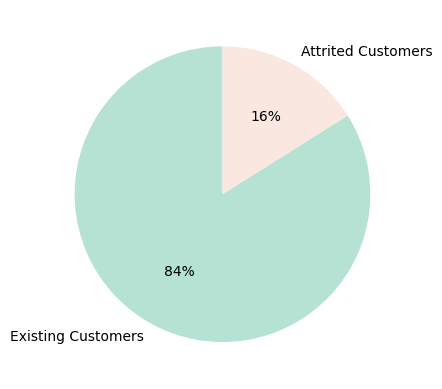

In [24]:
# Distribution of classes
print('\nCount:')
print(model_data['Attrition_Flag'].value_counts())

print('\nDistribution:')
print(model_data['Attrition_Flag'].value_counts() / model_data.shape[0])

# Visualize distribution with a pie chart
labels = ['Existing Customers', 'Attrited Customers']
colors = ['#B6E2D3', '#FAE8E0']

plt.pie(model_data['Attrition_Flag'].value_counts(), labels = labels, colors = colors, autopct='%.0f%%',startangle=90)
plt.show()

**Observation**
- Majority of the customers did not attrite. Only 16% of the customers attrited (Attrition_Flag=1), therefore, we have an imbalanced class. 

#### Divide independent variables into categorical and numerical features

In [25]:
# Identify categorical and numerical features
categorical_features = []
numerical_features = []
for i in model_data.columns:
    if model_data[i].dtype == 'object':
        categorical_features.append(i)  # Append to the list of categorical features
    else:
        numerical_features.append(i)    # Append to the list of categorical features

print(f"Categorical Features : {categorical_features}")
print(f"Numerical Features: {numerical_features}")

Categorical Features : ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical Features: ['Attrition_Flag', 'Customer_Age', 'Dependent_Count', 'Months_on_Book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


Boxplot: Visualize the distribution and identify outliers for each variable

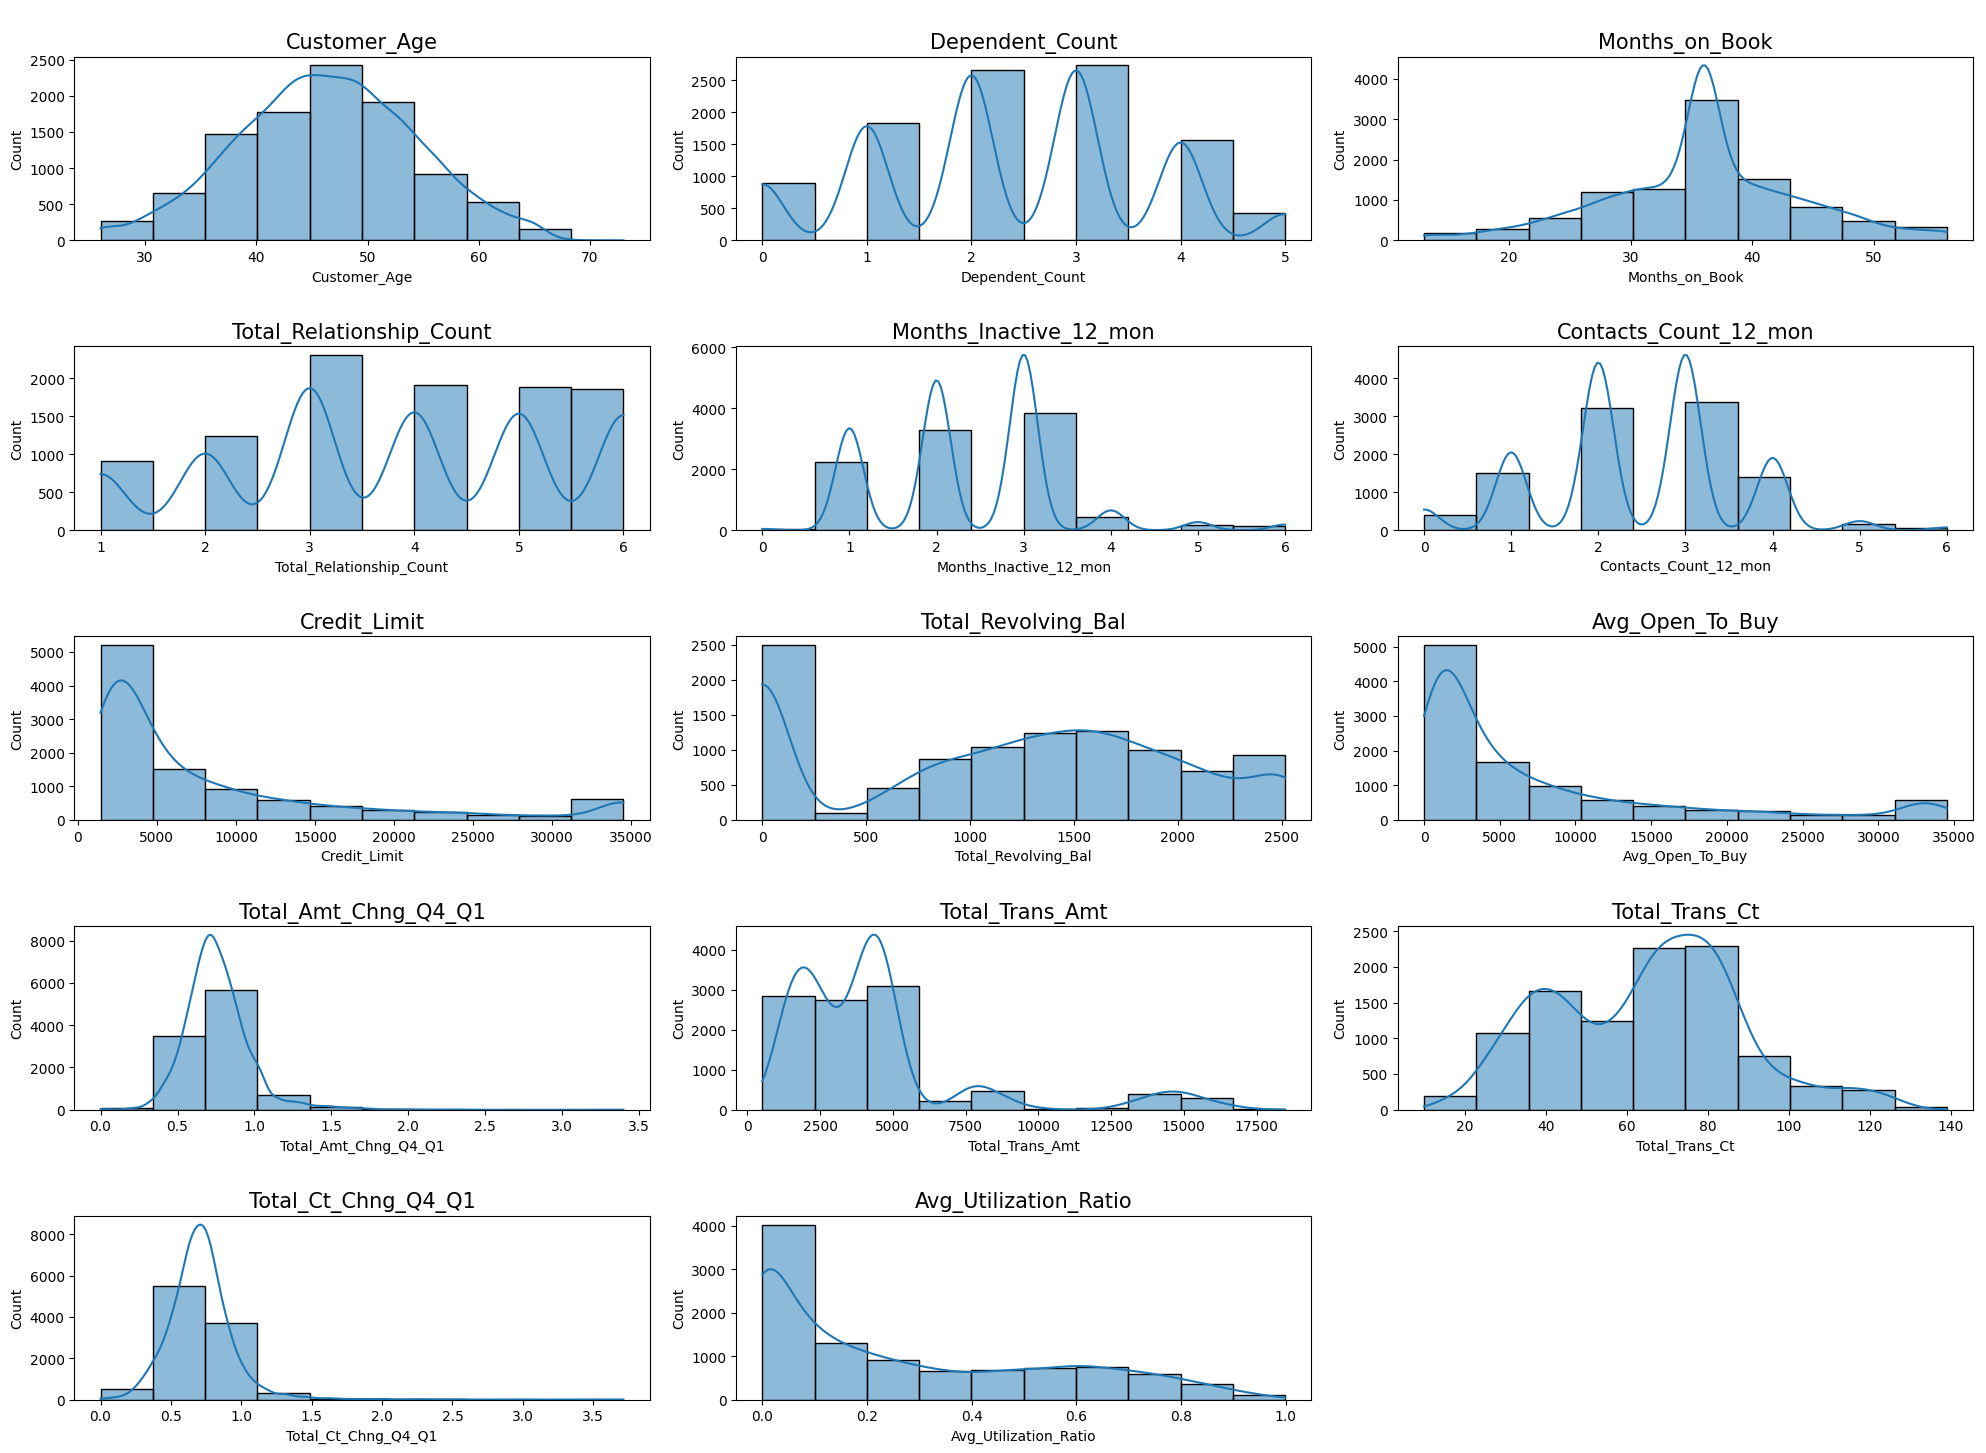

In [26]:
# Plot the histogram of numerical features
plt.figure(figsize = (20, 20))
plot_number = 1

bins_num= 10
for eachCol in numerical_features:
    if eachCol != "Attrition_Flag":
        x = model_data[eachCol]
        y = model_data
        ax = plt.subplot(7, 3, plot_number)
        sns.histplot(x = x, data = y, ax = ax, bins = bins_num, kde=True)
        plt.title(f"\n{eachCol}", fontsize = 15)
        plot_number += 1

plt.tight_layout()
plt.show()

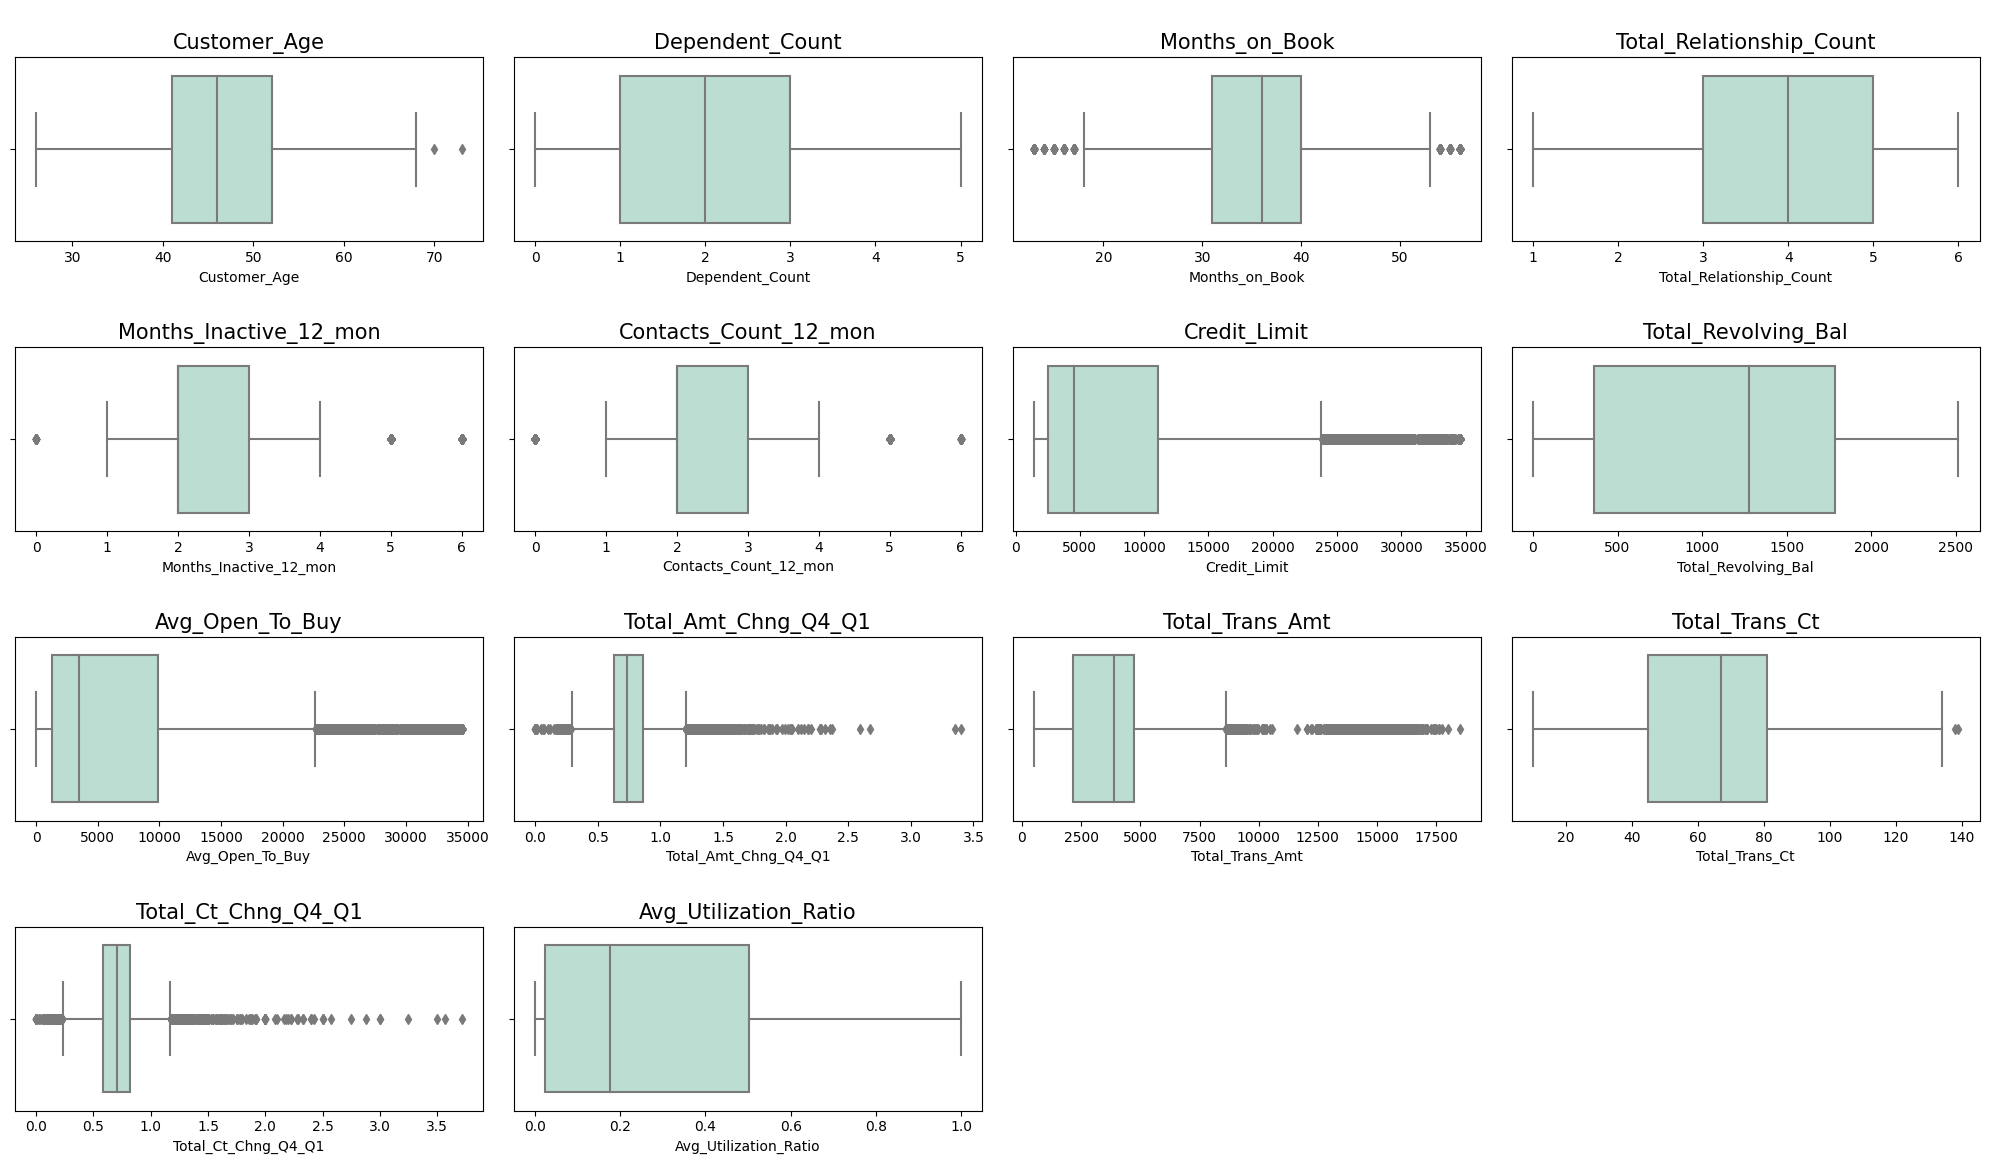

In [27]:
# Display the boxplot of numerical features
plt.figure(figsize = (20, 20))
plotnumber = 1

for feature in numerical_features:
    if feature != 'Attrition_Flag':
        x = model_data[feature]
        ax = plt.subplot(7, 4, plotnumber)
        sns.boxplot(x = x, color=colors[0])
        plt.title(f"\n{model_data[feature].name}", fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

Stacked Bar Chart: Compare categories

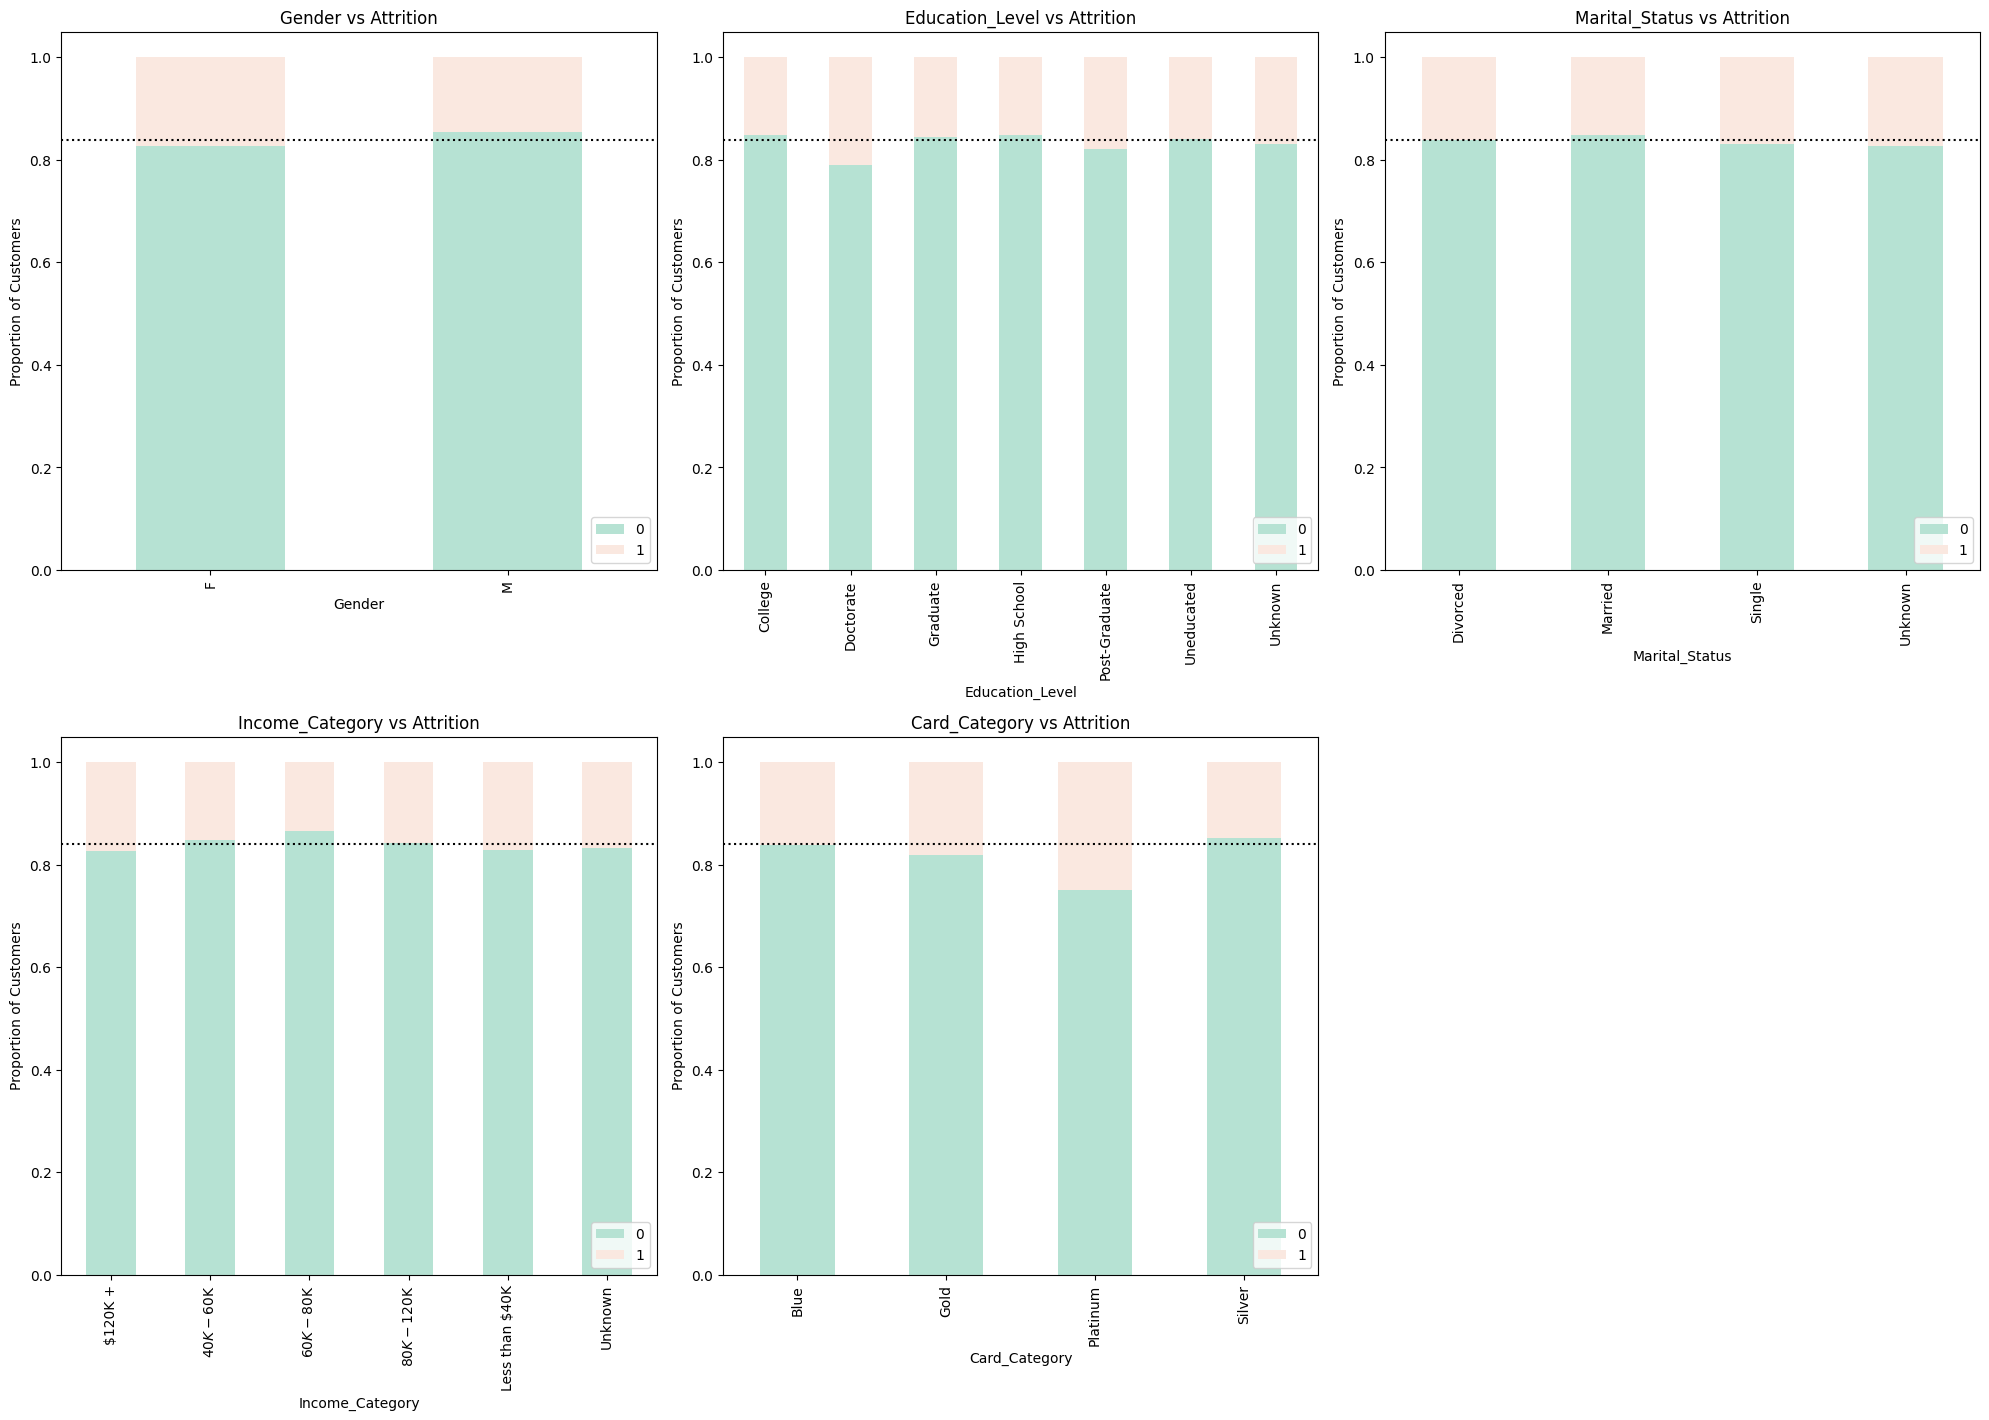

In [28]:
# Display stacked bar chart of categorical features
plt.figure(figsize = (20, 20))
plotnumber = 1

for feature in categorical_features:
    x = model_data[feature]
    ax = plt.subplot(3,3,plotnumber)   
    table=pd.crosstab(model_data[feature],model_data['Attrition_Flag'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax, stacked=True, color = colors).legend(loc='lower right')
    plt.title(f'{feature} vs Attrition')
    plt.ylabel('Proportion of Customers')
    plt.axhline(0.83934, color='black', ls='dotted')  # Baseline: Overall attrition rate
    plotnumber += 1

plt.tight_layout()
plt.show()

**Observations:**

- Gender: There are more female that attrited than males.
- Education Level: There are more Doctorate and Post-Grads customers who attrited.
- Marital Status: Those with relationship = "Single" or "Unknown" recorded more attrition than those who are married or divorced.
- Income Category: Customers in the 60K-80K income bracket have the lowest attrition rate.
- Card Category: Those with premium and gold cardholders have more attrition than blue and silver cardholders

#### Create Dummy Variables for Categorical Data

In [29]:
# Manually creating dummy variables
dummy_variables = []

# Create dummy variables for categorical data
def CreateDummies(in_data,old_var,new_var,list_val):
    in_data[new_var] = np.where(model_data[old_var].isin(list_val), 1, 0)
    dummy_variables.append(old_var)

# Creating dummy variables based on the results of EDA
CreateDummies(model_data,'Education_Level','Education_Level_Doc_PostGrad',['Doctorate', 'Post-Graduate'])
CreateDummies(model_data,'Marital_Status','Marital_Status_Divorced_Married',
                    ['Divorced','Married'])
CreateDummies(model_data,'Card_Category','Card_Category_Gold_Platinum',
                    ['Gold', 'Platinum'])

print('Variables transformed into dummy variables:\n',dummy_variables)

Variables transformed into dummy variables:
 ['Education_Level', 'Marital_Status', 'Card_Category']


In [30]:
model_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doc_PostGrad,Marital_Status_Divorced_Married,Card_Category_Gold_Platinum
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0,0,0
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,0,1,0


In [55]:
categorical_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [31]:
# Creating dummy variables using one-hot encoding
model_data = pd.get_dummies(model_data, columns=categorical_features, drop_first=True)

# print(model_data.info())
model_data.head(3)


,Attrition_Flag,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
model_data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_Count', 'Months_on_Book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doc_PostGrad', 'Marital_Status_Divorced_Married',
       'Card_Category_Gold_Platinum', 'Gender_M', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Cate

#### Correlation Heatmap

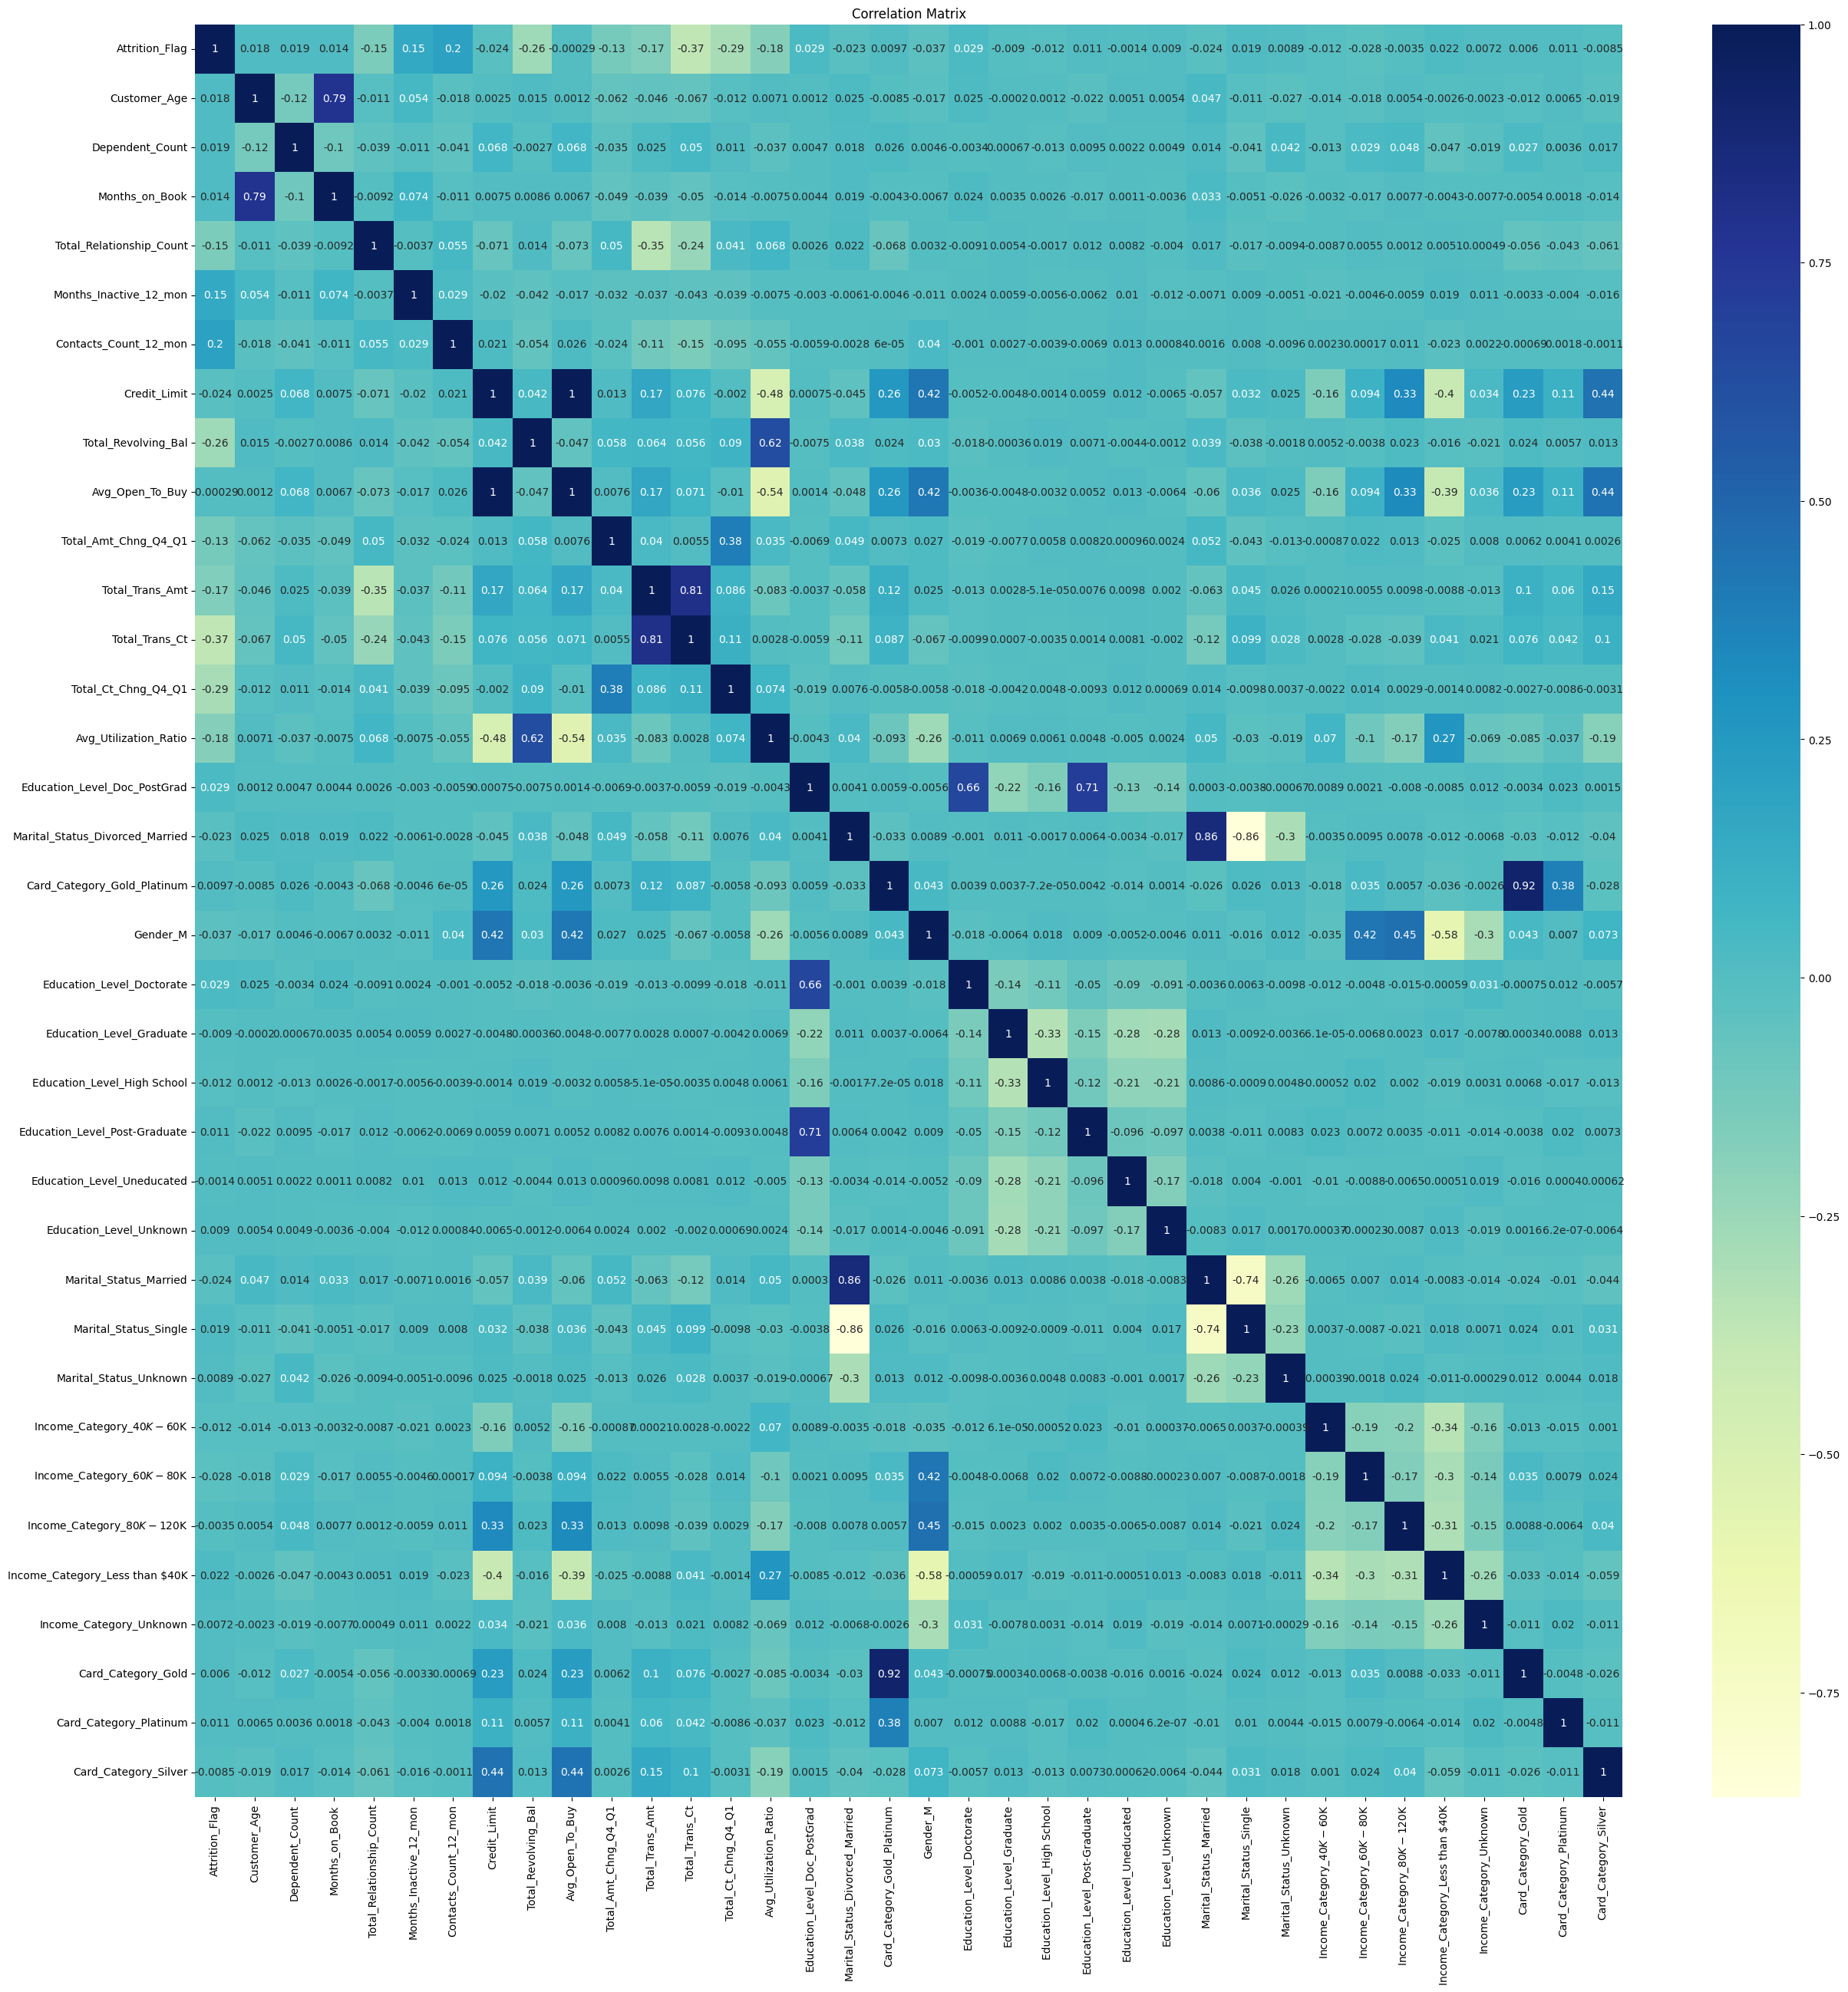

In [32]:
# Correlation Heat Map: Pair-wise correlation
plt.figure(figsize=(30,30))
sns.heatmap(model_data.corr(), annot=True, cmap='YlGnBu')  #coolwarm
plt.title('Correlation Matrix')
plt.show()

Correlation Coefficient Interpretation (Absolute Value)
<br>&emsp;Very Weak: 0.00 - 0.30
<br>&emsp;Weak: 0.30 to 0.50
<br>&emsp;Medium: 0.50 to 0.70
<br>&emsp;Strong: 0.70 to 0.90
<br>&emsp;Very Strong: 0.90 to 1.00
<br>Reference: https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8

#### FEATURE Selection

In [33]:

y_values = model_data.loc[:, model_data.columns == 'Attrition_Flag']
x_values = model_data.loc[:, model_data.columns != 'Attrition_Flag']

print('Dependent Variable:')
print(y_values.columns)

print('\nIndependent Variables:',len(x_values.columns))
print(x_values.columns)

Dependent Variable:
Index(['Attrition_Flag'], dtype='object')

Independent Variables: 35
Index(['Customer_Age', 'Dependent_Count', 'Months_on_Book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doc_PostGrad', 'Marital_Status_Divorced_Married',
       'Card_Category_Gold_Platinum', 'Gender_M', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unkn

#### Training and Test Sets

In [34]:
# Split the data into training (80%) and test (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=1234)

print('X Train:',x_train.shape)
print('Y Train:',y_train.shape)
print('X Test:',x_test.shape)
print('Y Test:',y_test.shape)
x_train.head()

X Train: (8101, 35)
Y Train: (8101, 1)
X Test: (2026, 35)
Y Test: (2026, 1)


,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9907,45,3,36,1,2,5,7500.0,0,7500.0,0.576,...,1,0,0,0,0,1,0,0,0,0
2396,49,2,39,3,2,2,11332.0,946,10386.0,0.857,...,0,0,0,0,1,0,0,0,0,0
4161,48,4,40,5,1,2,2514.0,2251,263.0,0.852,...,0,0,1,0,0,0,0,0,0,0
9212,47,3,36,4,3,6,5822.0,0,5822.0,0.655,...,0,0,1,0,0,0,0,0,0,0
3897,42,4,35,3,2,2,18274.0,1623,16651.0,0.681,...,0,0,0,0,1,0,0,0,0,0


#### Standardize/Scale Numerical Features

In [35]:
# Save a copy of the stats for scoring purposes
scaling_parameters = x_train.describe()

# Output parameters as csv file
scaling_parameters.to_csv('Credit Card Customer Attrition - Scaling Parameters.csv')

scaling_parameters.head()

,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,...,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.363042,2.341686,35.983089,3.811505,2.344278,2.460190,8598.932860,1161.333786,7437.599074,0.760016,...,0.386372,0.071720,0.177139,0.140847,0.153068,0.350451,0.107641,0.010739,0.002099,0.055302
std,7.992383,1.299298,7.969081,1.554014,1.016215,1.111689,9045.469442,814.295485,9055.472699,0.218784,...,0.486948,0.258039,0.381810,0.347885,0.360075,0.477141,0.309946,0.103080,0.045764,0.228583
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2544.000000,425.000000,1304.000000,0.630000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
# Scale numerical features
                
def ScaleData(in_data):
    out_data = in_data.copy()
    
    for colname in out_data.columns:

        if colname in numerical_features:
            
            # New column name                        
            new_colname = 'Std_' + colname

            # To scale, use the mean and standard deviation of the train dataset
            feature_mean = scaling_parameters[colname]['mean']
            feature_std = scaling_parameters[colname]['std']
            
            # Scale: z = (x - mean) / std
            out_data[new_colname] = ( out_data[colname] - feature_mean ) / feature_std

            out_data.drop(columns=colname, inplace=True)
            print(f"Scaling {colname} --> {new_colname} --> Mean={round(feature_mean,4)}, STD={round(feature_std,4)}")
            
    return out_data
    
# Scale features in the train set
x_train_final = ScaleData(x_train)
x_train_final.head()

# Scale features in the test set
x_test_final = ScaleData(x_test)
x_test_final.head()

Scaling Customer_Age --> Std_Customer_Age --> Mean=46.363, STD=7.9924
Scaling Dependent_Count --> Std_Dependent_Count --> Mean=2.3417, STD=1.2993
Scaling Months_on_Book --> Std_Months_on_Book --> Mean=35.9831, STD=7.9691
Scaling Total_Relationship_Count --> Std_Total_Relationship_Count --> Mean=3.8115, STD=1.554
Scaling Months_Inactive_12_mon --> Std_Months_Inactive_12_mon --> Mean=2.3443, STD=1.0162
Scaling Contacts_Count_12_mon --> Std_Contacts_Count_12_mon --> Mean=2.4602, STD=1.1117
Scaling Credit_Limit --> Std_Credit_Limit --> Mean=8598.9329, STD=9045.4694
Scaling Total_Revolving_Bal --> Std_Total_Revolving_Bal --> Mean=1161.3338, STD=814.2955
Scaling Avg_Open_To_Buy --> Std_Avg_Open_To_Buy --> Mean=7437.5991, STD=9055.4727
Scaling Total_Amt_Chng_Q4_Q1 --> Std_Total_Amt_Chng_Q4_Q1 --> Mean=0.76, STD=0.2188
Scaling Total_Trans_Amt --> Std_Total_Trans_Amt --> Mean=4414.4322, STD=3399.9556
Scaling Total_Trans_Ct --> Std_Total_Trans_Ct --> Mean=64.852, STD=23.4527
Scaling Total_Ct_Chn

,Education_Level_Doc_PostGrad,Marital_Status_Divorced_Married,Card_Category_Gold_Platinum,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,...,Std_Months_Inactive_12_mon,Std_Contacts_Count_12_mon,Std_Credit_Limit,Std_Total_Revolving_Bal,Std_Avg_Open_To_Buy,Std_Total_Amt_Chng_Q4_Q1,Std_Total_Trans_Amt,Std_Total_Trans_Ct,Std_Total_Ct_Chng_Q4_Q1,Std_Avg_Utilization_Ratio
6256,0,0,0,0,0,0,0,0,0,1,...,-0.338785,-0.413956,-0.736494,-0.301283,-0.708588,0.214751,-0.032775,1.029648,0.284274,0.708804
1834,0,1,0,0,0,0,1,0,0,0,...,-0.338785,1.385108,-0.384384,0.590285,-0.437039,0.799801,-0.737196,-1.102304,-0.070568,0.159799
797,0,1,0,0,0,0,0,0,0,1,...,0.645259,-0.413956,-0.345248,1.664833,-0.494574,0.946064,-0.847785,-0.889109,-0.087465,0.661849
3840,0,0,0,1,0,0,0,0,1,0,...,0.645259,1.385108,1.190327,0.528882,1.141453,-0.370300,-0.231601,0.048950,1.213624,-0.703438
1312,0,0,0,0,0,0,0,0,0,1,...,-1.322829,0.485576,-0.414233,0.756072,-0.481764,-0.425149,-0.776314,-0.420080,1.369923,0.322334


### Oversampling Using SMOTE (Synthetic Minority Oversampling Technique) Algorithm

In [37]:
oversample = SMOTE(random_state=1234)

x_oversample,y_oversample = oversample.fit_resample(x_train_final, y_train)

# Class distribution of the original training dataset / before performing SMOTE
print('\nBefore Oversampling:')
print('No. of Observations:',len(y_train))
print(y_train['Attrition_Flag'].value_counts() / len(y_train))

# Class distribution after performing SMOTE
print('\nAfter Oversampling:')
print('No. of Observations:',len(y_oversample))
print(y_oversample['Attrition_Flag'].value_counts() / len(y_oversample))


Before Oversampling:
No. of Observations: 8101
0    0.838538
1    0.161462
Name: Attrition_Flag, dtype: float64

After Oversampling:
No. of Observations: 13586
1    0.5
0    0.5
Name: Attrition_Flag, dtype: float64


----------
<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->
# **Logistic Regression**
----------

**Logistic Regression Assumptions that Need to be Satisfied**

1. The dependent variable is binary
2. The observations should be independent of each other
3. Little or no multicollinearity among the independent variables



### Recursive Feature Elimination
Perform RFE as initial feature elimination. This step will identify and remove weak / least important features.

In [38]:
# List of y and x variables
y_var = y_oversample.columns.values.tolist()
x_vars = x_oversample.columns.values.tolist()

# Using RFE, select/keep 30 features
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=30)
rfe = rfe.fit(x_oversample, y_oversample.values.ravel())

# Create a dataframe for the RFE result
rfe_summary = pd.DataFrame()
rfe_summary['varname'] = x_vars
rfe_summary['included'] = list(rfe.support_)
rfe_summary['rank'] = list(rfe.ranking_)

print(rfe_summary)

                            varname  included  rank
0      Education_Level_Doc_PostGrad      True     1
1   Marital_Status_Divorced_Married      True     1
2       Card_Category_Gold_Platinum      True     1
3                          Gender_M      True     1
4         Education_Level_Doctorate      True     1
5          Education_Level_Graduate      True     1
6       Education_Level_High School      True     1
7     Education_Level_Post-Graduate      True     1
8        Education_Level_Uneducated      True     1
9           Education_Level_Unknown      True     1
10           Marital_Status_Married      True     1
11            Marital_Status_Single      True     1
12           Marital_Status_Unknown      True     1
13      Income_Category_$40K - $60K      True     1
14      Income_Category_$60K - $80K      True     1
15     Income_Category_$80K - $120K      True     1
16   Income_Category_Less than $40K      True     1
17          Income_Category_Unknown      True     1
18          

In [39]:
# Get the list of features based on RFE result
rfe_passed = rfe_summary['varname'][(rfe_summary['included'] == True )]
rfe_passed

0        Education_Level_Doc_PostGrad
1     Marital_Status_Divorced_Married
2         Card_Category_Gold_Platinum
3                            Gender_M
4           Education_Level_Doctorate
5            Education_Level_Graduate
6         Education_Level_High School
7       Education_Level_Post-Graduate
8          Education_Level_Uneducated
9             Education_Level_Unknown
10             Marital_Status_Married
11              Marital_Status_Single
12             Marital_Status_Unknown
13        Income_Category_$40K - $60K
14        Income_Category_$60K - $80K
15       Income_Category_$80K - $120K
16     Income_Category_Less than $40K
17            Income_Category_Unknown
18                 Card_Category_Gold
19             Card_Category_Platinum
21                   Std_Customer_Age
22                Std_Dependent_Count
24       Std_Total_Relationship_Count
25         Std_Months_Inactive_12_mon
26          Std_Contacts_Count_12_mon
27                   Std_Credit_Limit
28          

### Fit Logistic Regression Model

In [40]:
# For the initial run, fit the the model using all the variables from RFE i.e., use drop_x = [].
# Then manually remove insignificant variables based on model evaluation results.

# Manually dropped variables (passed during initial rfe=30 vars)
drop_x = [
        # Failed p-value
        'Education_Level_Doctorate',
        'Education_Level_Post-Graduate',
        'Marital_Status_Married',
        'Marital_Status_Unknown',
        'Income_Category_Unknown',
        'Card_Category_Gold',
        'Card_Category_Platinum',
        'Card_Category_Gold_Platinum',
        
        # Removing dummies
        'Education_Level_Graduate',
        'Education_Level_High School',
        'Education_Level_Uneducated',
        'Education_Level_Unknown',
        'Income_Category_$40K - $60K',
        'Income_Category_$60K - $80K',
        'Income_Category_$80K - $120K',
        
        # Incorrect coefficient sign
        'Marital_Status_Single',
        'Income_Category_Less than $40K',
        'Std_Customer_Age',
        'Std_Contacts_Count_12_mon',
        'Std_Total_Trans_Amt',
        'Std_Total_Ct_Chng_Q4_Q1',
        'Education_Level_Doc_PostGrad',
        'Marital_Status_Divorced_Married'
        ]

# Final datasets for Logistic Regression modeling
x_train_logistic = x_oversample[rfe_passed.tolist()]   # Keep the columns based on RFE result
x_train_logistic.drop(columns=drop_x, inplace=True)    # Manually drop additional columns

y_train_logistic = y_oversample['Attrition_Flag']

# For statsmodels, add constant to the independent variables because it does not include the constant by default.
x_train_logistic_sm = sm.add_constant(x_train_logistic)

# Fit model using statsmodels
logit_model = sm.Logit(y_train_logistic,x_train_logistic_sm)
logit_model_result = logit_model.fit()
logit_model_summary = logit_model_result.summary()

# print(logit_model_summary)

Optimization terminated successfully.
         Current function value: 0.407864
         Iterations 7


### Initial Model Evaluation - Logistic Regression

**Check p-value**
- P < 0.05 Impactful 
- P >= 0.05 Not Impactful

**Check the sign of the coefficient**
- (+) Positive relationship with the target variable
- (-) Negative relationship with the target variable

**Test for Multicollinearity**
- Multicollinearity occurs when the independent variables are highly correlated to each other.

**Variance Inflation Factor (VIF) to test multicollinearity**
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others



In [41]:
# Convert model summary to dataframe
results_as_html = logit_model_summary.tables[1].as_html()
logit_result = pd.read_html(results_as_html, header=0, index_col=None)[0]

model_eval = pd.DataFrame()
model_eval["Predictors"] = x_train_logistic_sm.columns
model_eval["Coefficient"] = logit_result['coef']
model_eval['P-value'] = logit_result['P>|z|']
# model_eval

# Calculate VIFs. For each X, calculate VIF and save in dataframe
# Maintain only predictors (x's) with VIF < 10. No multicollinearity issues.
model_eval["VIF Factor"] = [variance_inflation_factor(x_train_logistic_sm.values, i) for i in range(x_train_logistic_sm.shape[1])]

# Tag evaluation result
model_eval['P-value Check'] = np.where(model_eval['P-value'] >= 0.05, 'Failed', 'Passed')
model_eval['VIF Check'] = np.where((model_eval['Predictors'] != 'const') & (model_eval['VIF Factor'] >= 10), 'Failed', 'Passed')

# Output the result/eval summary
model_eval

,Predictors,Coefficient,P-value,VIF Factor,P-value Check,VIF Check
0,const,-0.6303,0.0,2.141598,Passed,Passed
1,Gender_M,-1.0810,0.0,1.279530,Passed,Passed
2,Std_Dependent_Count,0.1329,0.0,1.006042,Passed,Passed
3,Std_Total_Relationship_Count,-0.7370,0.0,1.019864,Passed,Passed
4,Std_Months_Inactive_12_mon,0.5400,0.0,1.021152,Passed,Passed
5,Std_Credit_Limit,0.3237,0.0,1.302371,Passed,Passed
6,Std_Total_Revolving_Bal,-0.7454,0.0,1.035719,Passed,Passed
7,Std_Total_Trans_Ct,-1.8669,0.0,1.061784,Passed,Passed


**Interpretation:**
- Final table of evaluated model shows all p-value and VIF are within acceptable values 

In [42]:
# Fit the model using sklearn
# Disable penalty / regularization to have the same outputs as statsmodel
logistic_regression = LogisticRegression(penalty='none')

model_lr = logistic_regression.fit(x_train_logistic, y_train_logistic)

# Update the test dataset. Drop unnecessary columns. 
x_test_logistic = x_test_final[x_train_logistic.columns.tolist()]
y_test_logistic = y_test['Attrition_Flag']

# Predict the values of y in both the training and test datasets
# predict() is used to predict the class labels (1/0)
y_pred_train_lr = model_lr.predict(x_train_logistic)
y_pred_test_lr = model_lr.predict(x_test_logistic)

# predict_proba() is used to output probability estimates
y_pred_train_prob_lr = model_lr.predict_proba(x_train_logistic)
y_pred_test_prob_lr = model_lr.predict_proba(x_test_logistic)

# Compare statsmodels and sklearn model coefficients. Verify that they are the same.
print('const:\n',model_lr.intercept_)
print('\npredictors:\n',model_lr.coef_)

# Get test score
score = logistic_regression.score(x_train_logistic, y_train_logistic)
print("Test Accuracy Score", score)

const:
 [-0.63026809]

predictors:
 [[-1.08096225  0.13285125 -0.73702326  0.53995548  0.32367335 -0.74541577
  -1.86693792]]
Test Accuracy Score 0.8187104372147799


<!-- ![separator1](https://i.imgur.com/ZUWYTii.png) -->
----------
# Evaluate Logistic Regression Model
<!-- Get model summary as dataframe -->
 <!-- https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe -->
----------

#### Classification Score - Logistic Regression

In [43]:
# Create a summary of model scores
model_score_list = ['classification accuracy', 
                    'precision', 
                    'recall', 
                    'f1 score',  
                    'ROC AUC',]

model_score = pd.DataFrame(pd.Series(model_score_list))
model_score.set_index(0, inplace=True)
# model_score

In [44]:
# Create a summary table for evaluation metrics

isTrainData = True

for sample_data in list([[y_train_logistic, y_pred_train_lr], [y_test_logistic, y_pred_test_lr]]):
    y_logistic = sample_data[0]
    y_pred = sample_data[1]

    rowIndex = model_score.index[0]
    model_score.loc[rowIndex, '1 - Yes'] = np.nan
    model_score.loc[rowIndex, '0 - No'] = np.nan
    model_score.loc[rowIndex, 'weighted ave'] =accuracy_score(y_logistic, y_pred).round(2)
    model_score

    rowIndex = model_score.index[1] 
    model_score.loc[rowIndex, '1 - Yes'] = precision_score(y_logistic,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = precision_score(y_logistic,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = precision_score(y_logistic,y_pred, average='weighted').round(2)

    rowIndex = model_score.index[2]
    model_score.loc[rowIndex, '1 - Yes'] = recall_score(y_logistic,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = recall_score(y_logistic,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = recall_score(y_logistic,y_pred, average='weighted').round(2)

    rowIndex = model_score.index[3]
    model_score.loc[rowIndex, '1 - Yes'] = f1_score(y_logistic,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = f1_score(y_logistic,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = f1_score(y_logistic,y_pred, average='weighted').round(2)

    if isTrainData:
        model_score.index.name = 'TRAIN Model Score'
    else:
        model_score.index.name = 'TEST Model Score'

    display(model_score)
    isTrainData =  False

,1 - Yes,0 - No,weighted ave
TRAIN Model Score,,,
classification accuracy,NaN,NaN,0.82
precision,0.81,0.82,0.82
recall,0.83,0.81,0.82
f1 score,0.82,0.82,0.82
ROC AUC,NaN,NaN,NaN


,1 - Yes,0 - No,weighted ave
TEST Model Score,,,
classification accuracy,NaN,NaN,0.80
precision,0.43,0.96,0.87
recall,0.80,0.80,0.80
f1 score,0.56,0.87,0.82
ROC AUC,NaN,NaN,NaN



**TEST Score Explanation (Logistic Regression):**
- Classification Accuracy: 80% were predicted correctly
- Precision: Out of all the customers that the model predicted would attrite, 43% actually did.
- Recall: Out of all the customers that actually attrited, the model predicted this outcome correctly for 80% of those customers.
- F1-Score: Value closer to 1 is better. At ave of .82, it shows that the model did a fairly good job of predicting whether or not customers would attrite.

### Confusion Matrix - Logistic Regression

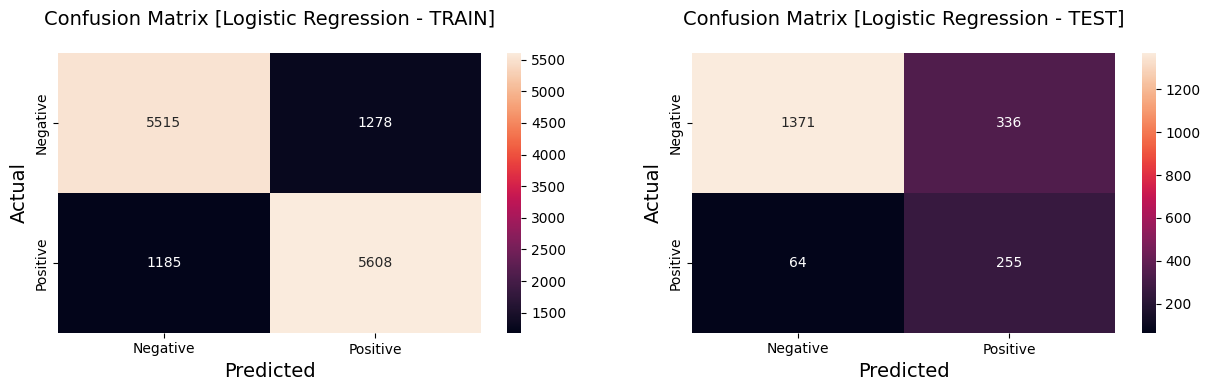

In [45]:
# Order of the input parameters is important: 
# 1st parameter - actual values
# 2nd parameter - predicted values
conf_matrix_train = confusion_matrix(y_train_logistic, y_pred_train_lr)
conf_matrix_test = confusion_matrix(y_test_logistic, y_pred_test_lr)


# Plot Confusion Matrix TRAIN

plt.figure(figsize=(15,8))

ax = plt.subplot(2, 2, 1)
ax = sns.heatmap(conf_matrix_train, annot=True, fmt='d')
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title(f"Confusion Matrix [Logistic Regression - TRAIN]", fontsize=14, pad=20)


# Plot Confusion Matrix TEST
ax = plt.subplot(2, 2, 2)
ax = sns.heatmap(conf_matrix_test, annot=True, fmt='d')
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title(f"Confusion Matrix [Logistic Regression - TEST]", fontsize=14, pad=20)
plt.show()

<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->
----------
# **Decision Tree**
----------

### Using K-Fold Cross Validation
- Use K-Fold Cross Validation on the training set to identify the optimal depth of the tree. The minimum leaf size is set to 500.
- The decision tree is evaluated on imbalanced dataset with SMOTE oversampling
- This step uses RepeatedStratifiedKFold which repeats the cross-validation procedure n times for a more accurate estimate of model performance

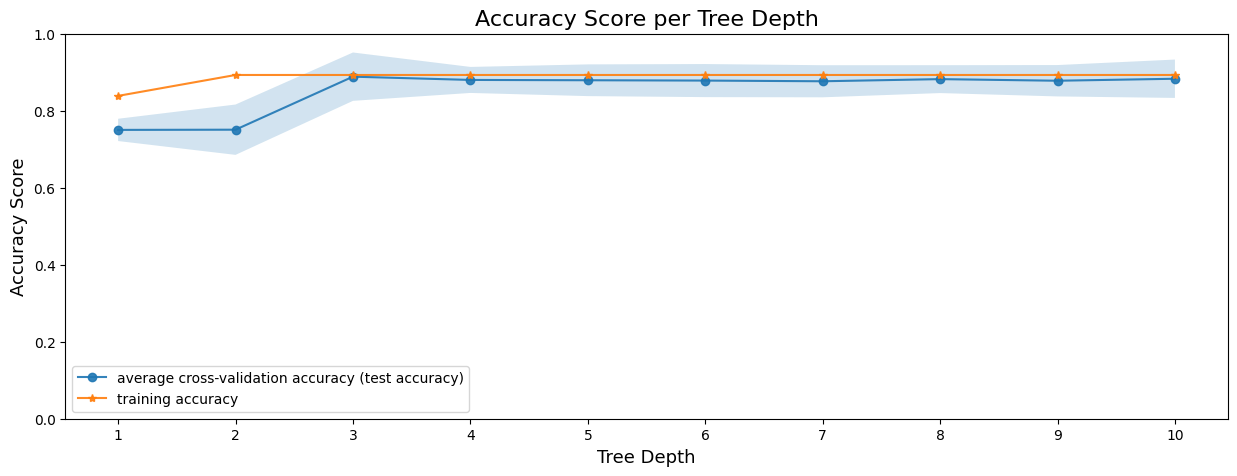

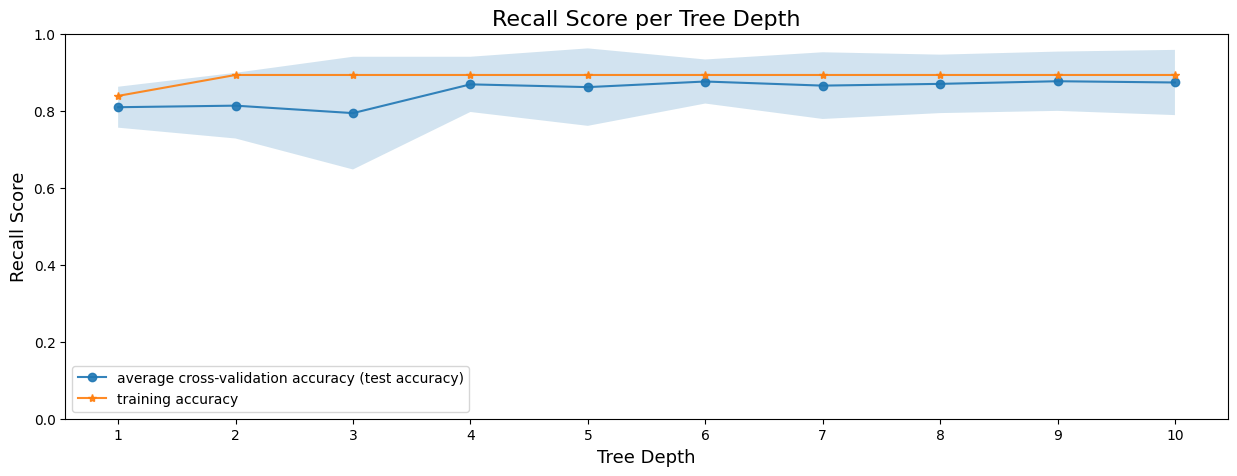

In [46]:
# Fitting trees on the training data using cross-validation
def CrossValidation_DecisionTree(X, y, tree_depths, scoring):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
    scores_list = []
    scores_std = []
    scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=500, max_depth=depth)
        steps = [('over', SMOTE()), ('model', tree_model)]
        pipeline = Pipeline(steps=steps)
        cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring)       
        scores_list.append(cv_scores)
        scores_mean.append(cv_scores.mean())
        scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return scores_mean, scores_std, accuracy_scores
  
# Plotting cross-validation results
def CrossValidationPlot_DecisionTree(depths, scores_mean, scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, scores_mean, '-o', label='average cross-validation accuracy (test accuracy)', alpha=0.9)
    ax.fill_between(depths, scores_mean-2*scores_std, scores_mean+2*scores_std, alpha=0.2)
    ax.plot(depths, accuracy_scores, '-*', label='training accuracy', alpha=0.9)
    ax.set_title(title + ' per Tree Depth', fontsize=16)
    ax.set_xlabel('Tree Depth', fontsize=13)
    ax.set_ylabel(title, fontsize=13)
    ax.set_ylim(0,1)
    ax.set_xticks(depths)
    ax.legend()

# Depths to be run
tree_depths = range(1,11)

# Cross-validation Results: mean, stdev, accuracy
scores_mean_accuracy, scores_std_accuracy, accuracy_scores = CrossValidation_DecisionTree(
    x_train, y_train, tree_depths, scoring='accuracy')
scores_mean_recall, scores_std_recall, recall_scores = CrossValidation_DecisionTree(
    x_train, y_train, tree_depths, scoring='recall')
    
# Plot results
CrossValidationPlot_DecisionTree(tree_depths, scores_mean_accuracy, scores_std_accuracy, accuracy_scores, 'Accuracy Score')
CrossValidationPlot_DecisionTree(tree_depths, scores_mean_recall, scores_std_recall, recall_scores, 'Recall Score')

**Observation:**
- Both the accuracy and recall scores stabilize at depth = 4. This will, together with min leaf size = 500, be used as runing criteria in the final decision tree.

### Fit Decision Tree Model

In [47]:
# Perform oversampling using SMOTE
x_oversample_dtree,y_oversample_dtree = oversample.fit_resample(x_train, y_train)

# Class distribution after performing SMOTE
print('\nAfter Oversampling:')
print('No. of Observations:',len(y_oversample_dtree))
print(y_oversample_dtree['Attrition_Flag'].value_counts() / len(y_oversample_dtree))


After Oversampling:
No. of Observations: 13586
1    0.5
0    0.5
Name: Attrition_Flag, dtype: float64


In [48]:
# Fit decision tree model
model_dtree = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=500, max_depth=4)
model_dtree.fit(x_oversample_dtree, y_oversample_dtree)

# Predict the values of y in both the training and test datasets
# predict() is used to predict the class labels (1/0)
y_pred_train_dtree = model_dtree.predict(x_oversample_dtree)
y_pred_test_dtree = model_dtree.predict(x_test)

# predict_proba() is used to output probability estimates
y_pred_train_prob_dtree = model_dtree.predict_proba(x_oversample_dtree)
y_pred_test_prob_dtree = model_dtree.predict_proba(x_test)

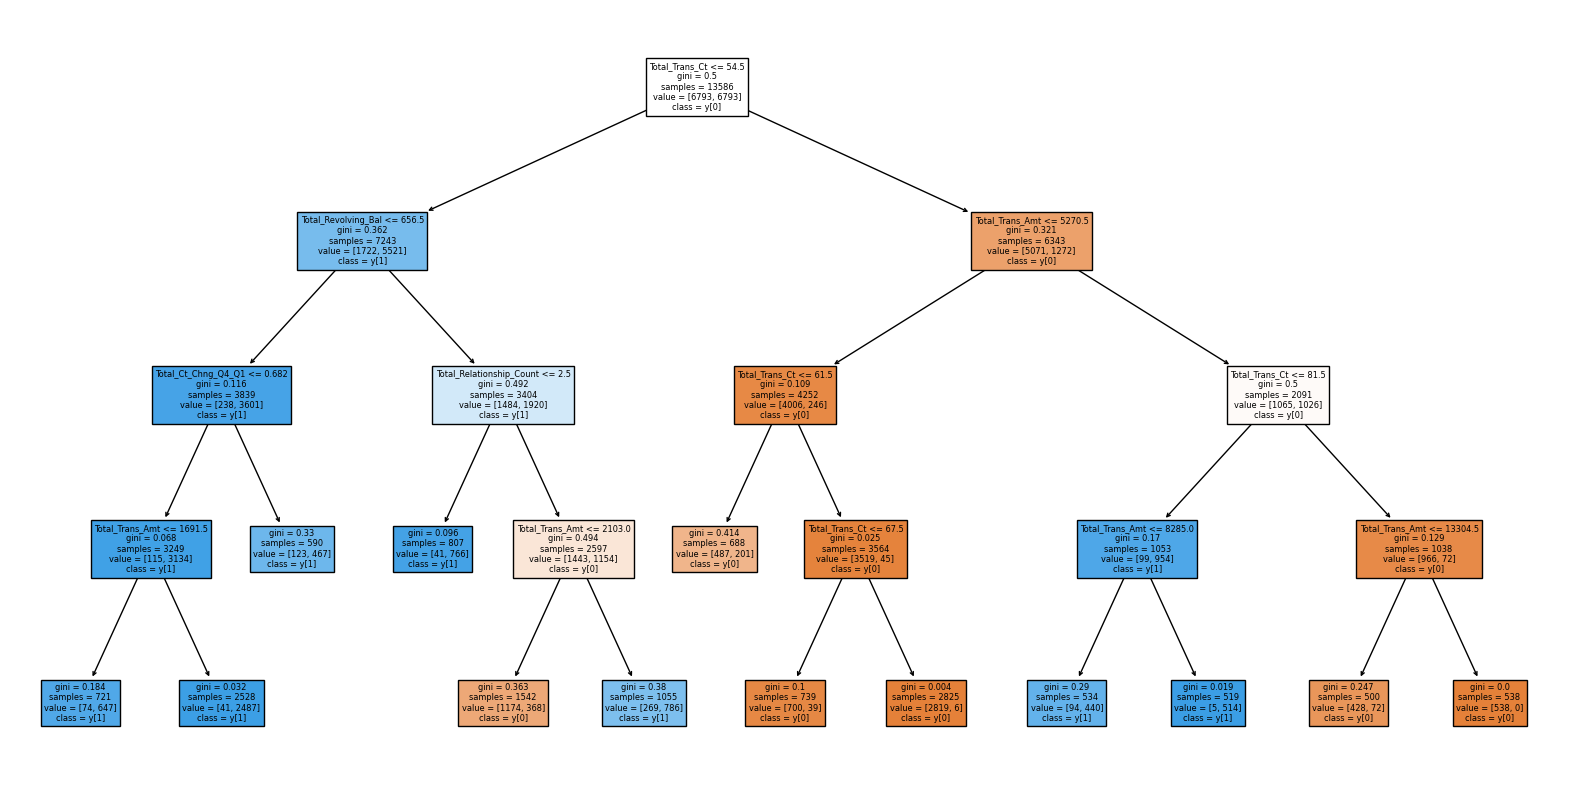

In [49]:
# Plot decision tree
fig = plt.figure(figsize = (20, 10))
tree.plot_tree(model_dtree, feature_names = list(x_oversample_dtree.columns), class_names = True, filled = True)
plt.show()

In [50]:
# Summary of Decision Tree Features 
dtree_summary = pd.DataFrame()
dtree_summary['Feature'] = x_oversample_dtree.columns
dtree_summary['Feature Importance'] = model_dtree.feature_importances_
dtree_summary = dtree_summary[dtree_summary['Feature Importance']>0]
dtree_summary

,Feature,Feature Importance
3,Total_Relationship_Count,0.066952
7,Total_Revolving_Bal,0.107659
10,Total_Trans_Amt,0.187765
11,Total_Trans_Ct,0.631242
12,Total_Ct_Chng_Q4_Q1,0.006382


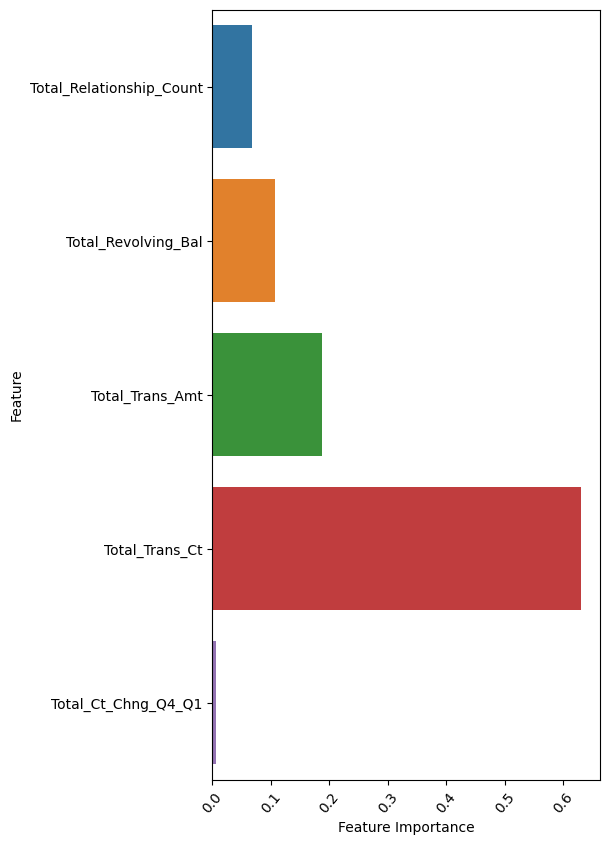

In [51]:
# Plot feature importance
fig = plt.figure(figsize = (5, 10))
# sns.barplot(x=model_dtree.feature_importances_, y=x_oversample_dtree.columns)
sns.barplot(x=dtree_summary['Feature Importance'], y=dtree_summary['Feature'])
plt.xticks(rotation = 50)
plt.show()

<!-- ![separator1](https://i.imgur.com/ZUWYTii.png) -->
----------
# Evaluate Decision Tree Model
<!-- Get model summary as dataframe -->
 <!-- https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe -->
----------

#### Classification Score - Decision Tree

In [52]:
isTrainData = True

for sample_data in list([[y_oversample_dtree, y_pred_train_dtree], [y_test, y_pred_test_dtree]]):
    y_dtree = sample_data[0]
    y_pred = sample_data[1]

    rowIndex = model_score.index[0]
    model_score.loc[rowIndex, '1 - Yes'] = np.nan
    model_score.loc[rowIndex, '0 - No'] = np.nan
    model_score.loc[rowIndex, 'weighted ave'] =accuracy_score(y_dtree, y_pred).round(2)
    model_score

    rowIndex = model_score.index[1] 
    model_score.loc[rowIndex, '1 - Yes'] = precision_score(y_dtree,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = precision_score(y_dtree,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = precision_score(y_dtree,y_pred, average='weighted').round(2)

    rowIndex = model_score.index[2]
    model_score.loc[rowIndex, '1 - Yes'] = recall_score(y_dtree,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = recall_score(y_dtree,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = recall_score(y_dtree,y_pred, average='weighted').round(2)

    rowIndex = model_score.index[3]
    model_score.loc[rowIndex, '1 - Yes'] = f1_score(y_dtree,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = f1_score(y_dtree,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = f1_score(y_dtree,y_pred, average='weighted').round(2)

    if isTrainData:
        model_score.index.name = 'TRAIN Model Score'
    else:
        model_score.index.name = 'TEST Model Score'

    display(model_score)
    isTrainData =  False

,1 - Yes,0 - No,weighted ave
TRAIN Model Score,,,
classification accuracy,NaN,NaN,0.9
precision,0.9,0.9,0.9
recall,0.9,0.9,0.9
f1 score,0.9,0.9,0.9
ROC AUC,NaN,NaN,NaN


,1 - Yes,0 - No,weighted ave
TEST Model Score,,,
classification accuracy,NaN,NaN,0.91
precision,0.65,0.97,0.92
recall,0.85,0.92,0.91
f1 score,0.74,0.94,0.91
ROC AUC,NaN,NaN,NaN



**TEST Score Explanation (Decision Tree):**
- Classification Accuracy: 91% were predicted correctly
- Precision: Out of all the customers that the model predicted would attrite, 65% actually did.
- Recall: Out of all the customers that actually attrited, the model predicted this outcome correctly for 85% of those customers.
- F1-Score: Value closer to 1 is better. At ave of 0.91, it shows that the model did a fairly good job of predicting whether or not customers would attrite.

### Confusion Matrix - Decision Tree

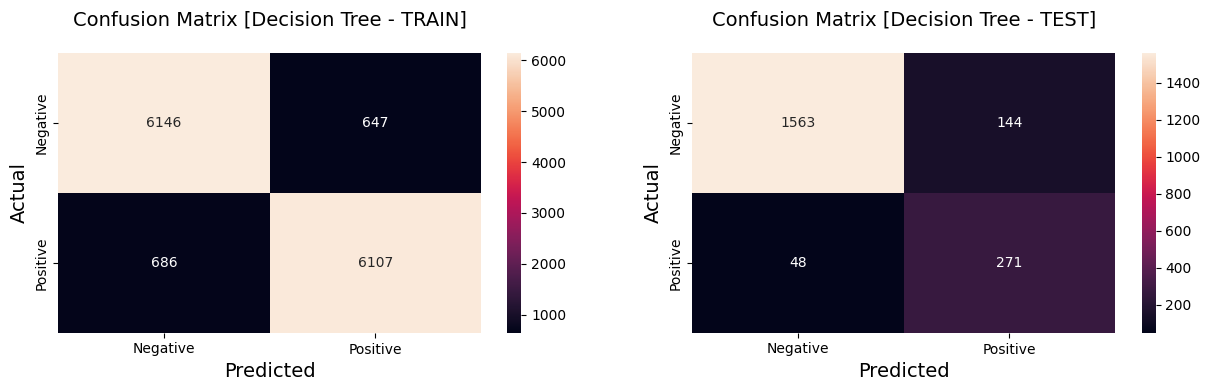

In [53]:
# Order of the input parameters is important: 
# 1st parameter - actual values
# 2nd parameter - predicted values
conf_matrix_train = confusion_matrix(y_oversample_dtree, y_pred_train_dtree)
conf_matrix_test = confusion_matrix(y_test, y_pred_test_dtree)


# Plot Confusion Matrix TRAIN

plt.figure(figsize=(15,8))

ax = plt.subplot(2, 2, 1)
ax = sns.heatmap(conf_matrix_train, annot=True, fmt='d')
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title(f"Confusion Matrix [Decision Tree - TRAIN]", fontsize=14, pad=20)


# Plot Confusion Matrix TEST
ax = plt.subplot(2, 2, 2)
ax = sns.heatmap(conf_matrix_test, annot=True, fmt='d')
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title(f"Confusion Matrix [Decision Tree - TEST]", fontsize=14, pad=20)
plt.show()

<!-- ![separator1](https://i.imgur.com/ZUWYTii.png) -->
----------
# Model Comparison
----------

Comparing the Logistic Regression and Decision Tree models based on their predictive performance by decile.
<!-- Get model summary as dataframe -->
 <!-- https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe -->

In [54]:
# Order the test data observations based on class probabilities (Attrition_Flag=1)
def decileSplit(y_actual,y_pred,y_pred_prob,tag):
    df = pd.DataFrame(y_pred_prob,columns=['prob_no','prob_yes'])
    df['actual'] = list(y_actual)
    df['predicted'] = y_pred
    df = df.sort_values(by='prob_yes', ascending=False)
    df['rank'] = np.arange(df.shape[0]) + 1

    bin_cut = len(df)/10
    bins_value = [0, 1*bin_cut, 2*bin_cut, 3*bin_cut, 4*bin_cut, 5*bin_cut, 6*bin_cut,
                  7*bin_cut, 8*bin_cut, 9*bin_cut, 10*bin_cut]
    bins_label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

    df['decile'] = pd.cut(df['rank'],bins=bins_value, labels=bins_label) 
    df['tag'] = tag
    
    return df

# Logistic Regression
decile_train_lr = decileSplit(y_actual=y_train_logistic,
                                   y_pred=y_pred_train_lr,
                                   y_pred_prob=y_pred_train_prob_lr,
                                   tag='Train - LR')
decile_test_lr = decileSplit(y_actual=y_test_logistic,
                                   y_pred=y_pred_test_lr,
                                   y_pred_prob=y_pred_test_prob_lr,
                                   tag='Test - LR')

# Decision Tree
decile_train_dt = decileSplit(y_actual=y_oversample_dtree['Attrition_Flag'],
                                   y_pred=y_pred_train_dtree,
                                   y_pred_prob=y_pred_train_prob_dtree,
                                   tag='Train - DT')
decile_test_dt = decileSplit(y_actual=y_test['Attrition_Flag'],
                                   y_pred=y_pred_test_dtree,
                                   y_pred_prob=y_pred_test_prob_dtree,
                                   tag='Test - DT')
                                           
decile_all = pd.concat([decile_train_lr, decile_test_lr,
                            decile_train_dt,decile_test_dt])
# decile_all

# Output as csv file
decile_all.to_csv('Train vs Test by Decile.csv')

# Conclusion
The decision tree model has better performance compared to the logistic regression model. Therefore, the final model for predicting credit card customer attrition is the one built using decision tree. The important features are (from highest to lowest importance):
- Total_Tran_Ct - total transaction count
- Total_Trans_Amt - total transaction amount
- Total_Revolving_Bal - total revolving balance
- Total_Relationship_Count - total number of relationships with the card issuer
- Total_Ct_Chng_Q4_Q1 - change in transaction count from Q4 to Q1 change

----------
<!-- ![separator1](https://i.imgur.com/ZUWYTii.png) -->

**References**

Logistic Regression:
- https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b#
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://machinelearningmastery.com/rfe-feature-selection-in-python/
- https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
- https://www.statology.org/sklearn-classification-report/

Decision Tree:
- https://medium.com/@chyun55555/decision-tree-classifier-with-scikit-learn-from-python-e83f38079fea
- https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://medium.com/analytics-vidhya/how-to-carry-out-k-fold-cross-validation-on-an-imbalanced-classification-problem-6d3d942a8016
- https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952


**Installations**
- numpy                  1.24.1
- pandas                 1.5.3
- matplotlib             3.6.3
- seaborn                0.12.2
- scikit-learn           1.2.0
- imblearn               0.0
- statsmodels            0.13.5